In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Importation des données

In [127]:

def import_json(file_path):
    if not os.path.exists(file_path):
        print(f"Le fichier {file_path} est introuvable. Veuillez vérifier le chemin.")
    else:
        try:
            data = pd.read_json(file_path)
            print("Fichier JSON lu avec succès.")
            return data
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier JSON : {e}")
            return None

In [128]:
def format_data(data):
    def params_to_dict(params):
        result = {}
        i = 0
        while i < len(params):
            if i + 1 < len(params) and not params[i + 1].startswith('-'):
                result[params[i]] = params[i + 1]
                i += 2
            else:
                result[params[i]] = True
                i += 1
        return result

    param_dicts = data['params'].apply(params_to_dict)
    param_df = pd.DataFrame(param_dicts.tolist())
    data = pd.concat([data.drop(columns=['params']), param_df], axis=1)
    data = data.apply(pd.to_numeric, errors='ignore')
    
    return data

### Simple algorithme

In [129]:
file_path = "./data-simple-fractal/results.json" 
data = import_json(file_path)
data.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal_simple,"[-h, 1000, -w, 1000]",0.19,9.39,49.11
1,../fractal/fractal_simple,"[-h, 1000, -w, 1500]",0.26,12.78,48.90
2,../fractal/fractal_simple,"[-h, 1000, -w, 2000]",0.34,16.69,48.81
3,../fractal/fractal_simple,"[-h, 1000, -w, 2500]",0.42,20.62,48.93
4,../fractal/fractal_simple,"[-h, 1000, -w, 3000]",0.61,29.93,49.36


In [130]:
data = format_data(data)
data.head()

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w
0,../fractal/fractal_simple,0.19,9.39,49.11,1000,1000
1,../fractal/fractal_simple,0.26,12.78,48.90,1000,1500
2,../fractal/fractal_simple,0.34,16.69,48.81,1000,2000
3,../fractal/fractal_simple,0.42,20.62,48.93,1000,2500
4,../fractal/fractal_simple,0.61,29.93,49.36,1000,3000


### optimisation 1

In [131]:
file_path_opti1 = "./data-opti1-fractal/results.json" 
data_opti1 = import_json(file_path_opti1)
data_opti1.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal,"[-h, 4500, -w, 4500, -f]",2.10,106.67,50.82
1,../fractal/fractal,"[-h, 4500, -w, 5000, -f]",2.39,117.76,49.17
2,../fractal/fractal,"[-h, 4500, -w, 5500, -f]",2.75,137.29,49.96
3,../fractal/fractal,"[-h, 4500, -w, 6000, -f]",2.87,142.83,49.81
4,../fractal/fractal,"[-h, 4500, -w, 6500, -f]",3.11,152.94,49.10


In [132]:
data_opti1 = format_data(data_opti1)
data_opti1.head()

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w,-f
0,../fractal/fractal,2.10,106.67,50.82,4500,4500,True
1,../fractal/fractal,2.39,117.76,49.17,4500,5000,True
2,../fractal/fractal,2.75,137.29,49.96,4500,5500,True
3,../fractal/fractal,2.87,142.83,49.81,4500,6000,True
4,../fractal/fractal,3.11,152.94,49.10,4500,6500,True


### Optimisation2

In [133]:
file_path_opti2 = "./data-opti2-fractal/results.json" 
data_opti2 = import_json(file_path_opti2)
data_opti2.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal,"[-h, 4500, -w, 4500, -f]",2.07,101.84,49.24
1,../fractal/fractal,"[-h, 4500, -w, 5000, -f]",2.39,119.76,50.11
2,../fractal/fractal,"[-h, 4500, -w, 5500, -f]",2.63,133.31,50.70
3,../fractal/fractal,"[-h, 4500, -w, 6000, -f]",2.83,142.05,50.20
4,../fractal/fractal,"[-h, 4500, -w, 6500, -f]",3.01,151.50,50.27


In [134]:
data_opti2 = format_data(data_opti2)
data_opti2.head()

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w,-f
0,../fractal/fractal,2.07,101.84,49.24,4500,4500,True
1,../fractal/fractal,2.39,119.76,50.11,4500,5000,True
2,../fractal/fractal,2.63,133.31,50.70,4500,5500,True
3,../fractal/fractal,2.83,142.05,50.20,4500,6000,True
4,../fractal/fractal,3.01,151.50,50.27,4500,6500,True


### Optimisation3

In [135]:
file_path_opti3 = "./data-opti3-fractal/results.json" 
data_opti3 = import_json(file_path_opti3)
data_opti3.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal,"[-h, 4500, -w, 4500, -f]",1.59,79.73,50.04
1,../fractal/fractal,"[-h, 4500, -w, 5000, -f]",1.77,88.62,50.18
2,../fractal/fractal,"[-h, 4500, -w, 5500, -f]",2.86,139.97,48.93
3,../fractal/fractal,"[-h, 4500, -w, 6000, -f]",2.03,103.38,51.02
4,../fractal/fractal,"[-h, 4500, -w, 6500, -f]",2.29,114.28,49.89


In [136]:
data_opti3 = format_data(data_opti3)
data_opti3.head()

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w,-f
0,../fractal/fractal,1.59,79.73,50.04,4500,4500,True
1,../fractal/fractal,1.77,88.62,50.18,4500,5000,True
2,../fractal/fractal,2.86,139.97,48.93,4500,5500,True
3,../fractal/fractal,2.03,103.38,51.02,4500,6000,True
4,../fractal/fractal,2.29,114.28,49.89,4500,6500,True


### Optimisation4

In [137]:
file_path_opti4 = "./data-opti4-fractal/results.json"
data_opti4 = import_json(file_path_opti4)
data_opti4.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal,"[-h, 4500, -w, 4500, -f]",0.22,19.44,86.87
1,../fractal/fractal,"[-h, 4500, -w, 5000, -f]",0.24,21.27,87.14
2,../fractal/fractal,"[-h, 4500, -w, 5500, -f]",0.25,22.56,91.49
3,../fractal/fractal,"[-h, 4500, -w, 6000, -f]",0.32,26.62,84.49
4,../fractal/fractal,"[-h, 4500, -w, 6500, -f]",0.36,29.13,81.10


In [138]:
data_opti4 = format_data(data_opti4)
data_opti4.head()

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w,-f
0,../fractal/fractal,0.22,19.44,86.87,4500,4500,True
1,../fractal/fractal,0.24,21.27,87.14,4500,5000,True
2,../fractal/fractal,0.25,22.56,91.49,4500,5500,True
3,../fractal/fractal,0.32,26.62,84.49,4500,6000,True
4,../fractal/fractal,0.36,29.13,81.10,4500,6500,True


### Optimisation5

In [139]:
file_path_opti5 = "./data-opti5-fractal/results.json"
data_opti5 = import_json(file_path_opti5)
data_opti5.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal,"[-h, 4500, -w, 4500, -f]",0.99,51.28,51.75
1,../fractal/fractal,"[-h, 4500, -w, 5000, -f]",1.15,58.71,51.02
2,../fractal/fractal,"[-h, 4500, -w, 5500, -f]",1.25,64.10,51.23
3,../fractal/fractal,"[-h, 4500, -w, 6000, -f]",1.35,69.35,51.25
4,../fractal/fractal,"[-h, 4500, -w, 6500, -f]",1.45,73.80,51.03


In [140]:
data_opti5 = format_data(data_opti5)
data_opti5.head()

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w,-f
0,../fractal/fractal,0.99,51.28,51.75,4500,4500,True
1,../fractal/fractal,1.15,58.71,51.02,4500,5000,True
2,../fractal/fractal,1.25,64.10,51.23,4500,5500,True
3,../fractal/fractal,1.35,69.35,51.25,4500,6000,True
4,../fractal/fractal,1.45,73.80,51.03,4500,6500,True


### Optimisation6

In [141]:
file_path_opti6 = "./data-opti6-fractal/results.json"
data_opti6 = import_json(file_path_opti6)
data_opti6.head()

Fichier JSON lu avec succès.


,command,params,time,energy,power
0,../fractal/fractal,"[-h, 4500, -w, 4500, -f]",0.19,14.75,78.89
1,../fractal/fractal,"[-h, 4500, -w, 5000, -f]",0.16,14.12,90.61
2,../fractal/fractal,"[-h, 4500, -w, 5500, -f]",0.20,16.58,83.58
3,../fractal/fractal,"[-h, 4500, -w, 6000, -f]",0.31,21.11,69.20
4,../fractal/fractal,"[-h, 4500, -w, 6500, -f]",0.28,21.42,76.16


In [142]:
data_opti6 = format_data(data_opti6)
data_opti6.head()

/tmp/ipykernel_282073/2143005355.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


,command,time,energy,power,-h,-w,-f
0,../fractal/fractal,0.19,14.75,78.89,4500,4500,True
1,../fractal/fractal,0.16,14.12,90.61,4500,5000,True
2,../fractal/fractal,0.20,16.58,83.58,4500,5500,True
3,../fractal/fractal,0.31,21.11,69.20,4500,6000,True
4,../fractal/fractal,0.28,21.42,76.16,4500,6500,True


# Analyse des données

## Premier aperçu

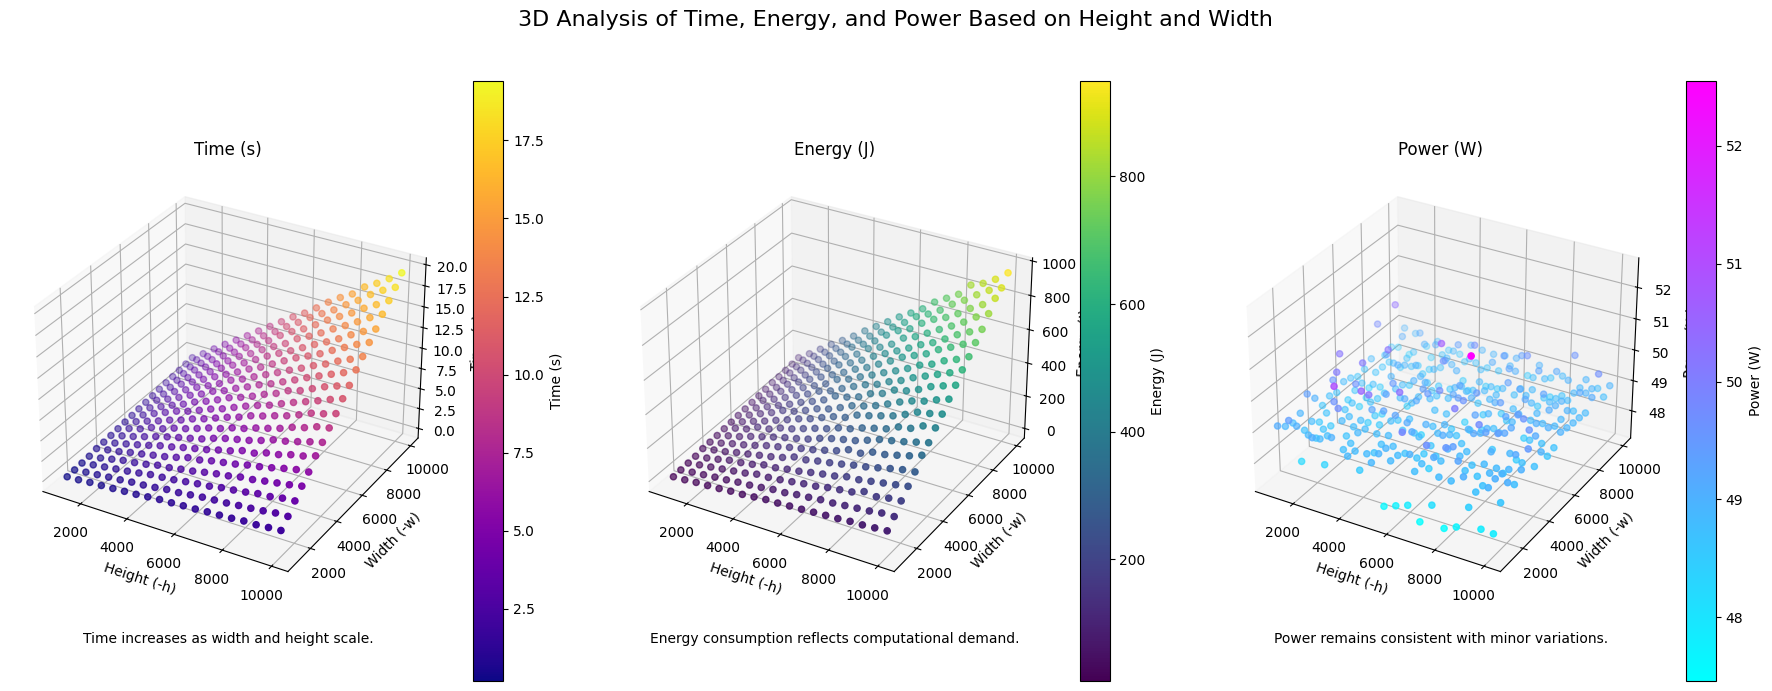

In [143]:
fig = plt.figure(figsize=(18, 7))
fig.suptitle('3D Analysis of Time, Energy, and Power Based on Height and Width', fontsize=16)

ax1 = fig.add_subplot(131, projection='3d')
sc_time = ax1.scatter(data['-h'], data['-w'], data['time'], c=data['time'], cmap='plasma', label='Time')
ax1.set_title('Time (s)')
ax1.set_xlabel('Height (-h)')
ax1.set_ylabel('Width (-w)')
ax1.set_zlabel('Time (s)')
plt.colorbar(sc_time, ax=ax1, label='Time (s)')
ax1.text2D(0.5, -0.1, "Time increases as width and height scale.", transform=ax1.transAxes, fontsize=10, ha='center')

ax2 = fig.add_subplot(132, projection='3d')
sc_energy = ax2.scatter(data['-h'], data['-w'], data['energy'], c=data['energy'], cmap='viridis', label='Energy')
ax2.set_title('Energy (J)')
ax2.set_xlabel('Height (-h)')
ax2.set_ylabel('Width (-w)')
ax2.set_zlabel('Energy (J)')
plt.colorbar(sc_energy, ax=ax2, label='Energy (J)')
ax2.text2D(0.5, -0.1, "Energy consumption reflects computational demand.", transform=ax2.transAxes, fontsize=10, ha='center')

ax3 = fig.add_subplot(133, projection='3d')
sc_power = ax3.scatter(data['-h'], data['-w'], data['power'], c=data['power'], cmap='cool', label='Power')
ax3.set_title('Power (W)')
ax3.set_xlabel('Height (-h)')
ax3.set_ylabel('Width (-w)')
ax3.set_zlabel('Power (W)')
plt.colorbar(sc_power, ax=ax3, label='Power (W)')
ax3.text2D(0.5, -0.1, "Power remains consistent with minor variations.", transform=ax3.transAxes, fontsize=10, ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Introduction de l’Indicateur : Energy-Delay Product (EDP)

Pour évaluer les performances de nos différentes implémentations, nous proposons d’utiliser un indicateur combinant à la fois le temps d’exécution et l’énergie consommée. Une métrique couramment utilisée dans le domaine des systèmes et de l’informatique verte est le **Energy-Delay Product (EDP)**.

**Définition :**  

$$
\text{EDP} = \text{Temps d’exécution} \times \text{Énergie consommée}
$$

- Le temps d’exécution est généralement exprimé en secondes.
- L’énergie consommée, dans notre cas, est en Joules.

En réduisant simultanément le temps et la consommation, un EDP plus faible signifie une meilleure performance globale.

In [144]:
data['EDP'] = data['time'] * data['energy']
data_opti1['EDP'] = data_opti1['time'] * data_opti1['energy']
data_opti2['EDP'] = data_opti2['time'] * data_opti2['energy']
data_opti3['EDP'] = data_opti3['time'] * data_opti3['energy']
data_opti4['EDP'] = data_opti4['time'] * data_opti4['energy']
data_opti5['EDP'] = data_opti5['time'] * data_opti5['energy']
data_opti6['EDP'] = data_opti6['time'] * data_opti6['energy']

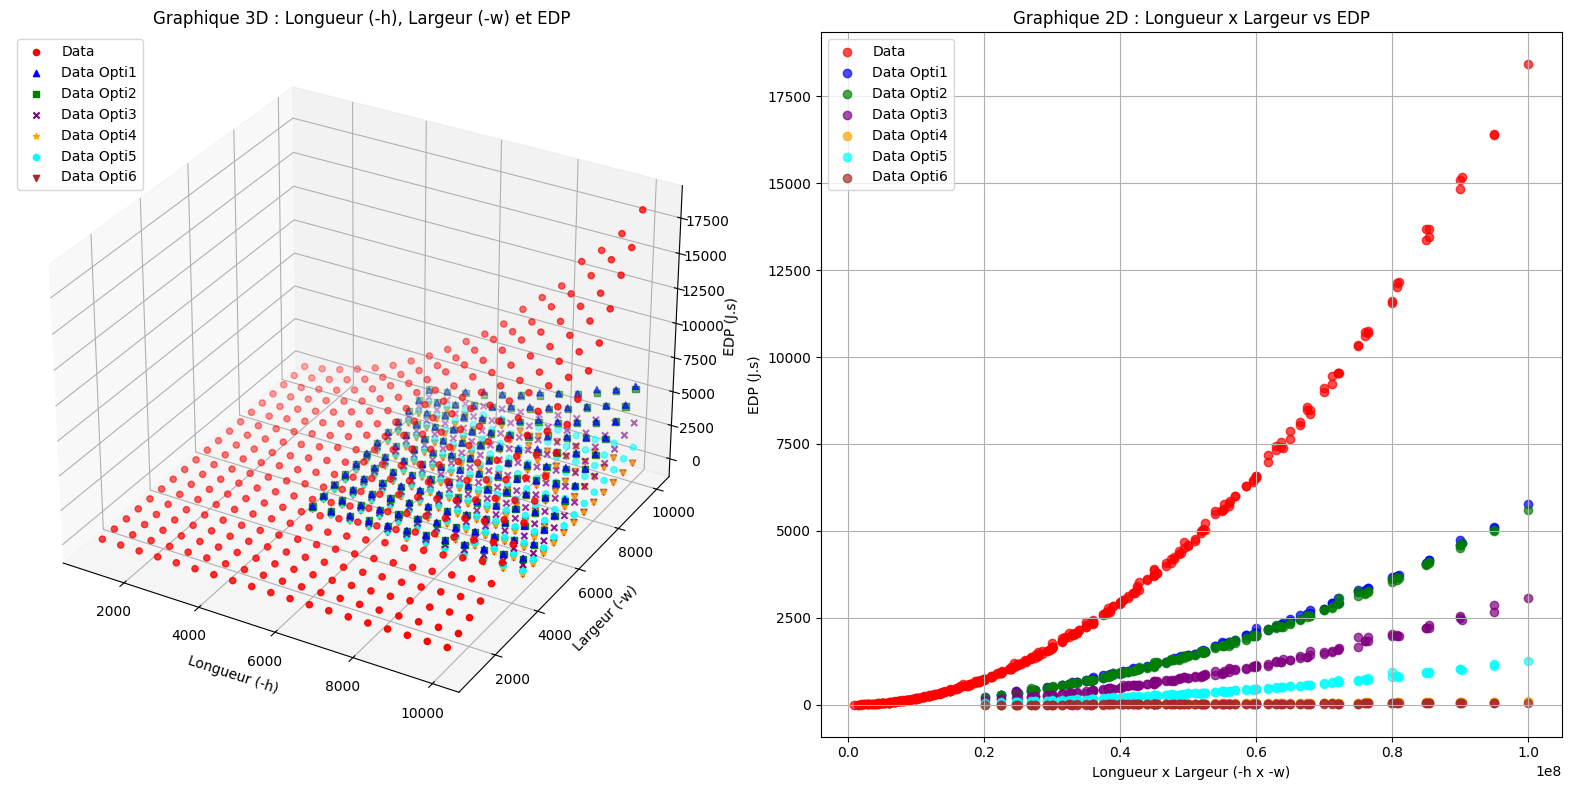

In [145]:
fig = plt.figure(figsize=(16, 8))

ax_3d = fig.add_subplot(121, projection='3d')
sc = ax_3d.scatter(data['-h'], data['-w'], data['EDP'], c='red', label='Data')
sc_opti1 = ax_3d.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['EDP'], c='blue', marker='^', label='Data Opti1')
sc_opti2 = ax_3d.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['EDP'], c='green', marker='s', label='Data Opti2')
sc_opti3 = ax_3d.scatter(data_opti3['-h'], data_opti3['-w'], data_opti3['EDP'], c='purple', marker='x', label='Data Opti3')
sc_opti4 = ax_3d.scatter(data_opti4['-h'], data_opti4['-w'], data_opti4['EDP'], c='orange', marker='*', label='Data Opti4')
sc_opti5 = ax_3d.scatter(data_opti5['-h'], data_opti5['-w'], data_opti5['EDP'], c='cyan', marker='o', label='Data Opti5')
sc_opti6 = ax_3d.scatter(data_opti6['-h'], data_opti6['-w'], data_opti6['EDP'], c='brown', marker='v', label='Data Opti6')
ax_3d.set_title("Graphique 3D : Longueur (-h), Largeur (-w) et EDP", fontsize=12)
ax_3d.set_xlabel("Longueur (-h)")
ax_3d.set_ylabel("Largeur (-w)")
ax_3d.set_zlabel("EDP (J.s)")
ax_3d.legend(loc='upper left')

ax_2d = fig.add_subplot(122)
ax_2d.scatter(data['-h'] * data['-w'], data['EDP'], c='red', label='Data', alpha=0.7)
ax_2d.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['EDP'], c='blue', label='Data Opti1', alpha=0.7)
ax_2d.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['EDP'], c='green', label='Data Opti2', alpha=0.7)
ax_2d.scatter(data_opti3['-h'] * data_opti3['-w'], data_opti3['EDP'], c='purple', label='Data Opti3', alpha=0.7)
ax_2d.scatter(data_opti4['-h'] * data_opti4['-w'], data_opti4['EDP'], c='orange', label='Data Opti4', alpha=0.7)
ax_2d.scatter(data_opti5['-h'] * data_opti5['-w'], data_opti5['EDP'], c='cyan', label='Data Opti5', alpha=0.7)
ax_2d.scatter(data_opti6['-h'] * data_opti6['-w'], data_opti6['EDP'], c='brown', label='Data Opti6', alpha=0.7)
ax_2d.set_title("Graphique 2D : Longueur x Largeur vs EDP", fontsize=12)
ax_2d.set_xlabel("Longueur x Largeur (-h x -w)")
ax_2d.set_ylabel("EDP (J.s)")
ax_2d.grid(True)
ax_2d.legend(loc='upper left')

plt.tight_layout()
plt.show()

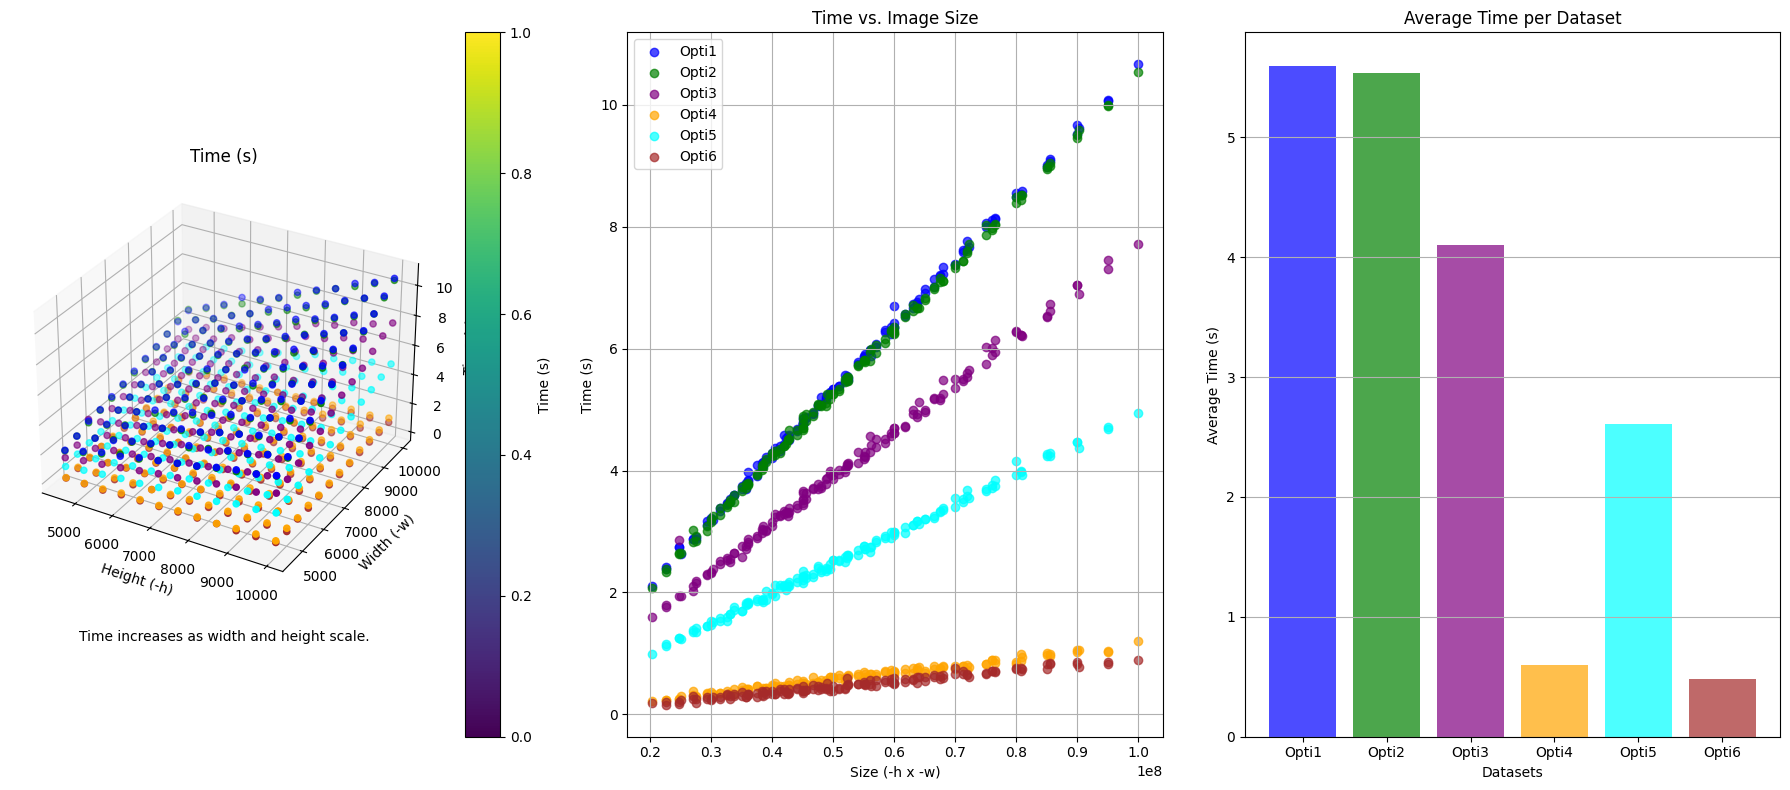

In [146]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(131, projection='3d')
sc_time1 = ax1.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['time'], c='blue', label='Opti1')
sc_time2 = ax1.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['time'], c='green', label='Opti2')
sc_time3 = ax1.scatter(data_opti3['-h'], data_opti3['-w'], data_opti3['time'], c='purple', label='Opti3')
sc_time4 = ax1.scatter(data_opti4['-h'], data_opti4['-w'], data_opti4['time'], c='orange', label='Opti4')
sc_time5 = ax1.scatter(data_opti5['-h'], data_opti5['-w'], data_opti5['time'], c='cyan', label='Opti5')
sc_time6 = ax1.scatter(data_opti6['-h'], data_opti6['-w'], data_opti6['time'], c='brown', label='Opti6')
ax1.set_title('Time (s)', fontsize=12)
ax1.set_xlabel('Height (-h)', fontsize=10)
ax1.set_ylabel('Width (-w)', fontsize=10)
ax1.set_zlabel('Time (s)', fontsize=10)
plt.colorbar(sc_time1, ax=ax1, label='Time (s)')
ax1.text2D(0.5, -0.1, "Time increases as width and height scale.", transform=ax1.transAxes, fontsize=10, ha='center')

ax2 = fig.add_subplot(132)
ax2.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['time'], c='blue', label='Opti1', alpha=0.7)
ax2.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['time'], c='green', label='Opti2', alpha=0.7)
ax2.scatter(data_opti3['-h'] * data_opti3['-w'], data_opti3['time'], c='purple', label='Opti3', alpha=0.7)
ax2.scatter(data_opti4['-h'] * data_opti4['-w'], data_opti4['time'], c='orange', label='Opti4', alpha=0.7)
ax2.scatter(data_opti5['-h'] * data_opti5['-w'], data_opti5['time'], c='cyan', label='Opti5', alpha=0.7)
ax2.scatter(data_opti6['-h'] * data_opti6['-w'], data_opti6['time'], c='brown', label='Opti6', alpha=0.7)
ax2.set_title('Time vs. Image Size', fontsize=12)
ax2.set_xlabel('Size (-h x -w)', fontsize=10)
ax2.set_ylabel('Time (s)', fontsize=10)
ax2.grid(True)
ax2.legend()

avg_time = [data_opti1['time'].mean(), data_opti2['time'].mean(), data_opti3['time'].mean(), data_opti4['time'].mean(), data_opti5['time'].mean(), data_opti6['time'].mean()]
labels = ['Opti1', 'Opti2', 'Opti3', 'Opti4', 'Opti5', 'Opti6']
ax3 = fig.add_subplot(133)
ax3.bar(labels, avg_time, color=['blue', 'green', 'purple', 'orange', 'cyan', 'brown'], alpha=0.7)
ax3.set_title('Average Time per Dataset', fontsize=12)
ax3.set_xlabel('Datasets', fontsize=10)
ax3.set_ylabel('Average Time (s)', fontsize=10)
ax3.grid(axis='y')

plt.tight_layout()
plt.show()

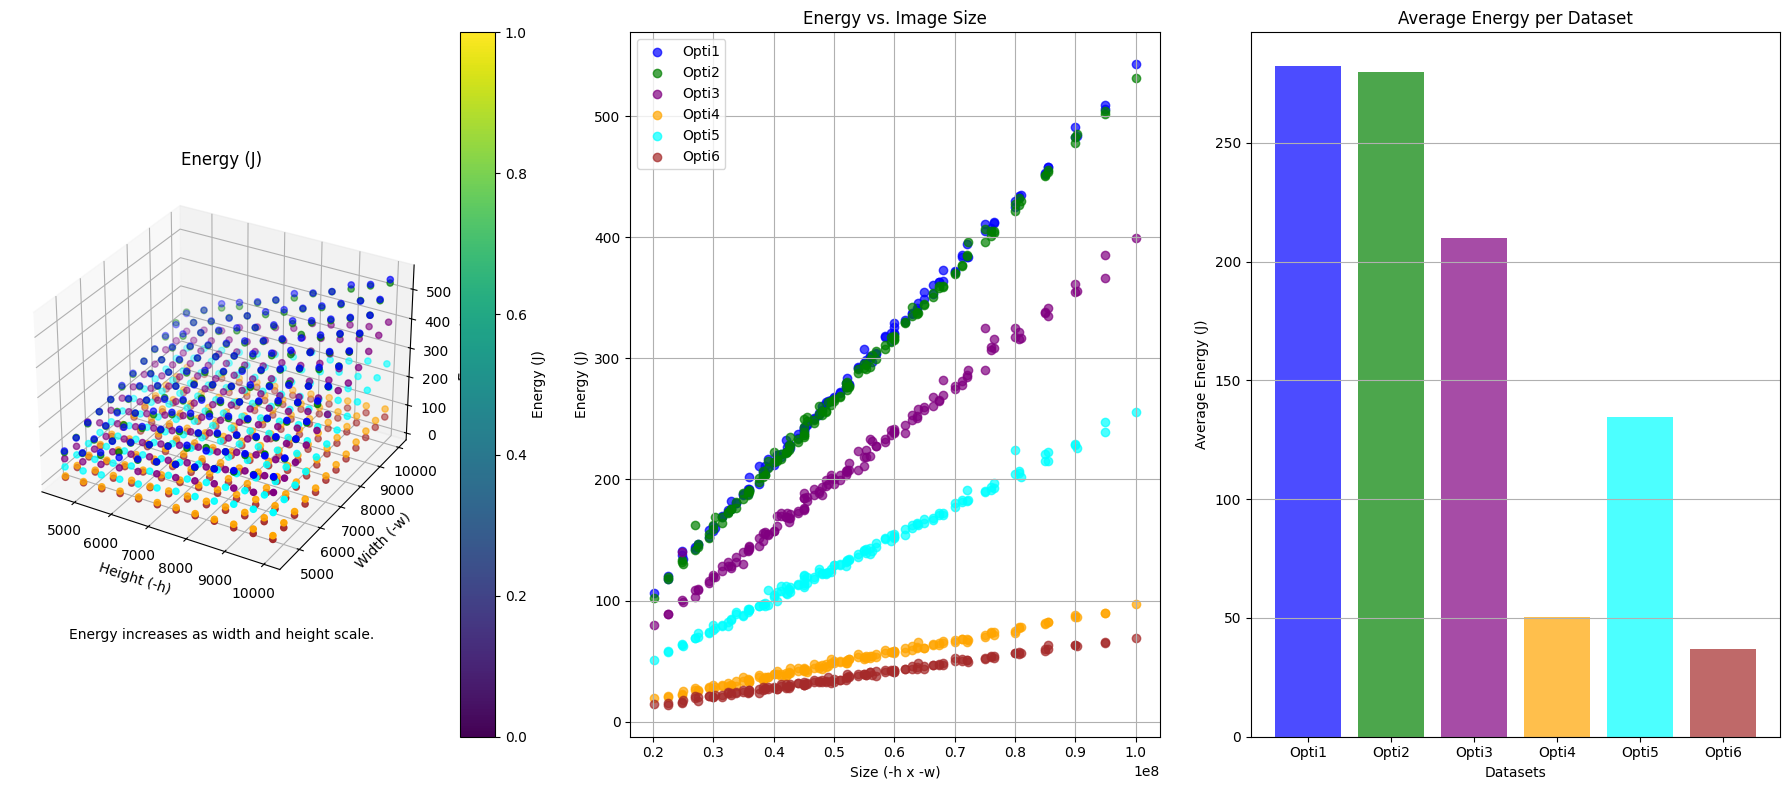

In [152]:
# Create the figure for the 'energy' equivalent plots
fig = plt.figure(figsize=(18, 8))

# 3D scatter plot with 'energy'
ax1 = fig.add_subplot(131, projection='3d')
sc_energy1 = ax1.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['energy'], c='blue', label='Opti1')
sc_energy2 = ax1.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['energy'], c='green', label='Opti2')
sc_energy3 = ax1.scatter(data_opti3['-h'], data_opti3['-w'], data_opti3['energy'], c='purple', label='Opti3')
sc_energy4 = ax1.scatter(data_opti4['-h'], data_opti4['-w'], data_opti4['energy'], c='orange', label='Opti4')
sc_energy5 = ax1.scatter(data_opti5['-h'], data_opti5['-w'], data_opti5['energy'], c='cyan', label='Opti5')
sc_energy6 = ax1.scatter(data_opti6['-h'], data_opti6['-w'], data_opti6['energy'], c='brown', label='Opti6')
ax1.set_title('Energy (J)', fontsize=12)
ax1.set_xlabel('Height (-h)', fontsize=10)
ax1.set_ylabel('Width (-w)', fontsize=10)
ax1.set_zlabel('Energy (J)', fontsize=10)
plt.colorbar(sc_energy1, ax=ax1, label='Energy (J)')
ax1.text2D(0.5, -0.1, "Energy increases as width and height scale.", transform=ax1.transAxes, fontsize=10, ha='center')

# 2D scatter plot with 'energy' vs size
ax2 = fig.add_subplot(132)
ax2.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['energy'], c='blue', label='Opti1', alpha=0.7)
ax2.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['energy'], c='green', label='Opti2', alpha=0.7)
ax2.scatter(data_opti3['-h'] * data_opti3['-w'], data_opti3['energy'], c='purple', label='Opti3', alpha=0.7)
ax2.scatter(data_opti4['-h'] * data_opti4['-w'], data_opti4['energy'], c='orange', label='Opti4', alpha=0.7)
ax2.scatter(data_opti5['-h'] * data_opti5['-w'], data_opti5['energy'], c='cyan', label='Opti5', alpha=0.7)
ax2.scatter(data_opti6['-h'] * data_opti6['-w'], data_opti6['energy'], c='brown', label='Opti6', alpha=0.7)
ax2.set_title('Energy vs. Image Size', fontsize=12)
ax2.set_xlabel('Size (-h x -w)', fontsize=10)
ax2.set_ylabel('Energy (J)', fontsize=10)
ax2.grid(True)
ax2.legend()

# Bar plot for average 'energy'
avg_energy = [data_opti1['energy'].mean(), data_opti2['energy'].mean(), data_opti3['energy'].mean(), data_opti4['energy'].mean(), data_opti5['energy'].mean(), data_opti6['energy'].mean()]
labels = ['Opti1', 'Opti2', 'Opti3', 'Opti4', 'Opti5', 'Opti6']
ax3 = fig.add_subplot(133)
ax3.bar(labels, avg_energy, color=['blue', 'green', 'purple', 'orange', 'cyan', 'brown'], alpha=0.7)
ax3.set_title('Average Energy per Dataset', fontsize=12)
ax3.set_xlabel('Datasets', fontsize=10)
ax3.set_ylabel('Average Energy (J)', fontsize=10)
ax3.grid(axis='y')

plt.tight_layout()
plt.show()


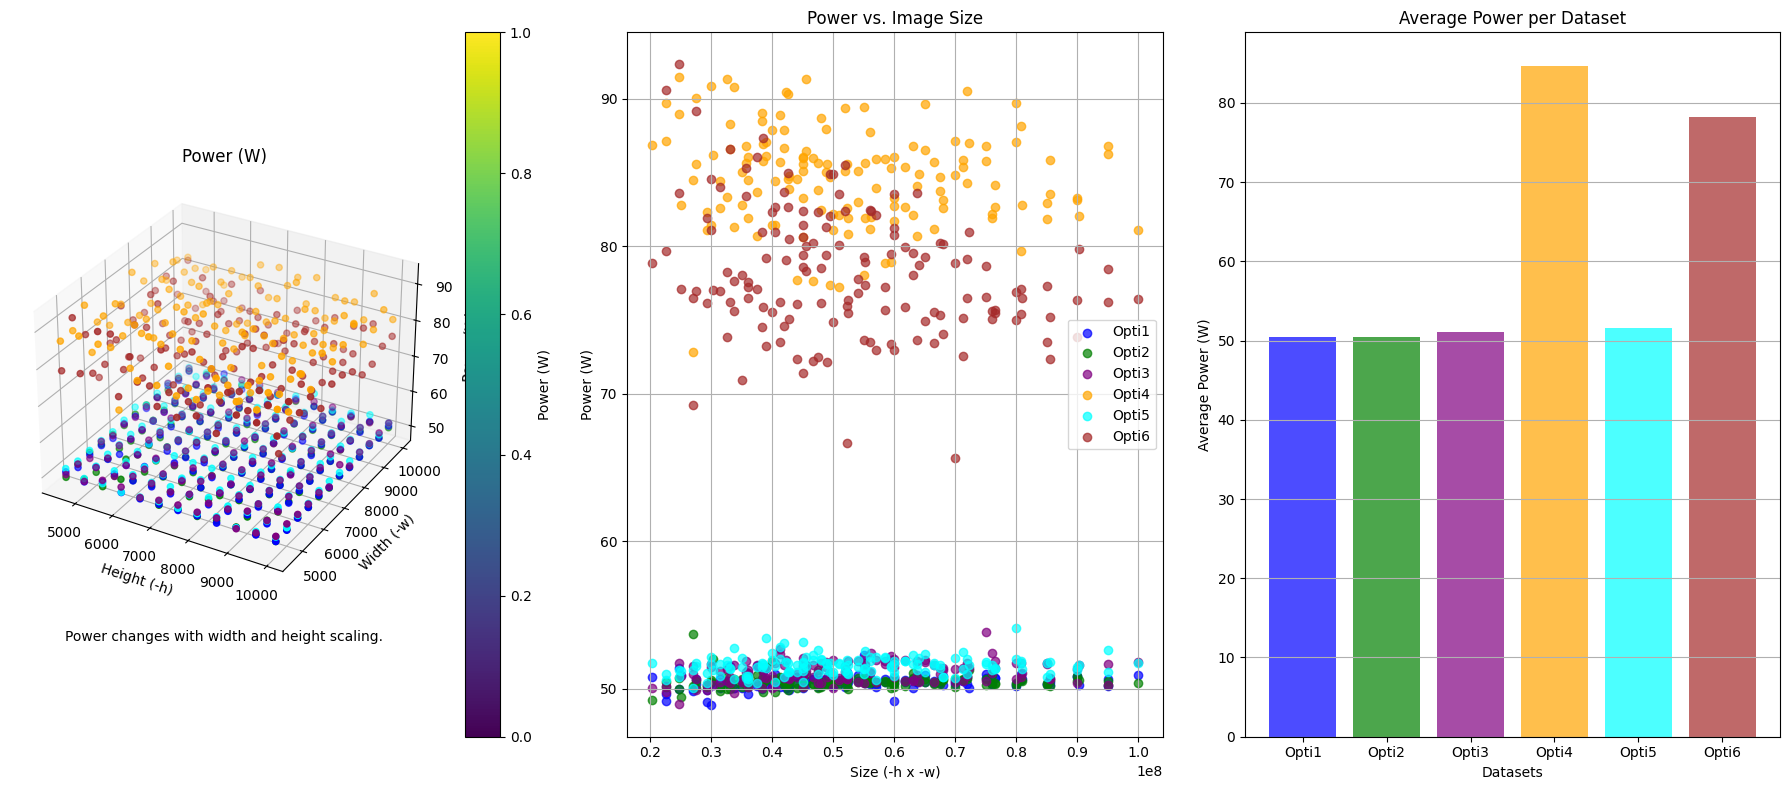

In [148]:
# Create the figure for the 'power' equivalent plots
fig = plt.figure(figsize=(18, 8))

# 3D scatter plot with 'power'
ax1 = fig.add_subplot(131, projection='3d')
sc_power1 = ax1.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['power'], c='blue', label='Opti1')
sc_power2 = ax1.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['power'], c='green', label='Opti2')
sc_power3 = ax1.scatter(data_opti3['-h'], data_opti3['-w'], data_opti3['power'], c='purple', label='Opti3')
sc_power4 = ax1.scatter(data_opti4['-h'], data_opti4['-w'], data_opti4['power'], c='orange', label='Opti4')
sc_power5 = ax1.scatter(data_opti5['-h'], data_opti5['-w'], data_opti5['power'], c='cyan', label='Opti5')
sc_power6 = ax1.scatter(data_opti6['-h'], data_opti6['-w'], data_opti6['power'], c='brown', label='Opti6')
ax1.set_title('Power (W)', fontsize=12)
ax1.set_xlabel('Height (-h)', fontsize=10)
ax1.set_ylabel('Width (-w)', fontsize=10)
ax1.set_zlabel('Power (W)', fontsize=10)
plt.colorbar(sc_power1, ax=ax1, label='Power (W)')
ax1.text2D(0.5, -0.1, "Power changes with width and height scaling.", transform=ax1.transAxes, fontsize=10, ha='center')

# 2D scatter plot with 'power' vs size
ax2 = fig.add_subplot(132)
ax2.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['power'], c='blue', label='Opti1', alpha=0.7)
ax2.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['power'], c='green', label='Opti2', alpha=0.7)
ax2.scatter(data_opti3['-h'] * data_opti3['-w'], data_opti3['power'], c='purple', label='Opti3', alpha=0.7)
ax2.scatter(data_opti4['-h'] * data_opti4['-w'], data_opti4['power'], c='orange', label='Opti4', alpha=0.7)
ax2.scatter(data_opti5['-h'] * data_opti5['-w'], data_opti5['power'], c='cyan', label='Opti5', alpha=0.7)
ax2.scatter(data_opti6['-h'] * data_opti6['-w'], data_opti6['power'], c='brown', label='Opti6', alpha=0.7)
ax2.set_title('Power vs. Image Size', fontsize=12)
ax2.set_xlabel('Size (-h x -w)', fontsize=10)
ax2.set_ylabel('Power (W)', fontsize=10)
ax2.grid(True)
ax2.legend()

# Bar plot for average 'power'
avg_power = [data_opti1['power'].mean(), data_opti2['power'].mean(), data_opti3['power'].mean(), data_opti4['power'].mean(), data_opti5['power'].mean(), data_opti6['power'].mean()]
labels = ['Opti1', 'Opti2', 'Opti3', 'Opti4', 'Opti5', 'Opti6']
ax3 = fig.add_subplot(133)
ax3.bar(labels, avg_power, color=['blue', 'green', 'purple', 'orange', 'cyan', 'brown'], alpha=0.7)
ax3.set_title('Average Power per Dataset', fontsize=12)
ax3.set_xlabel('Datasets', fontsize=10)
ax3.set_ylabel('Average Power (W)', fontsize=10)
ax3.grid(axis='y')

plt.tight_layout()
plt.show()


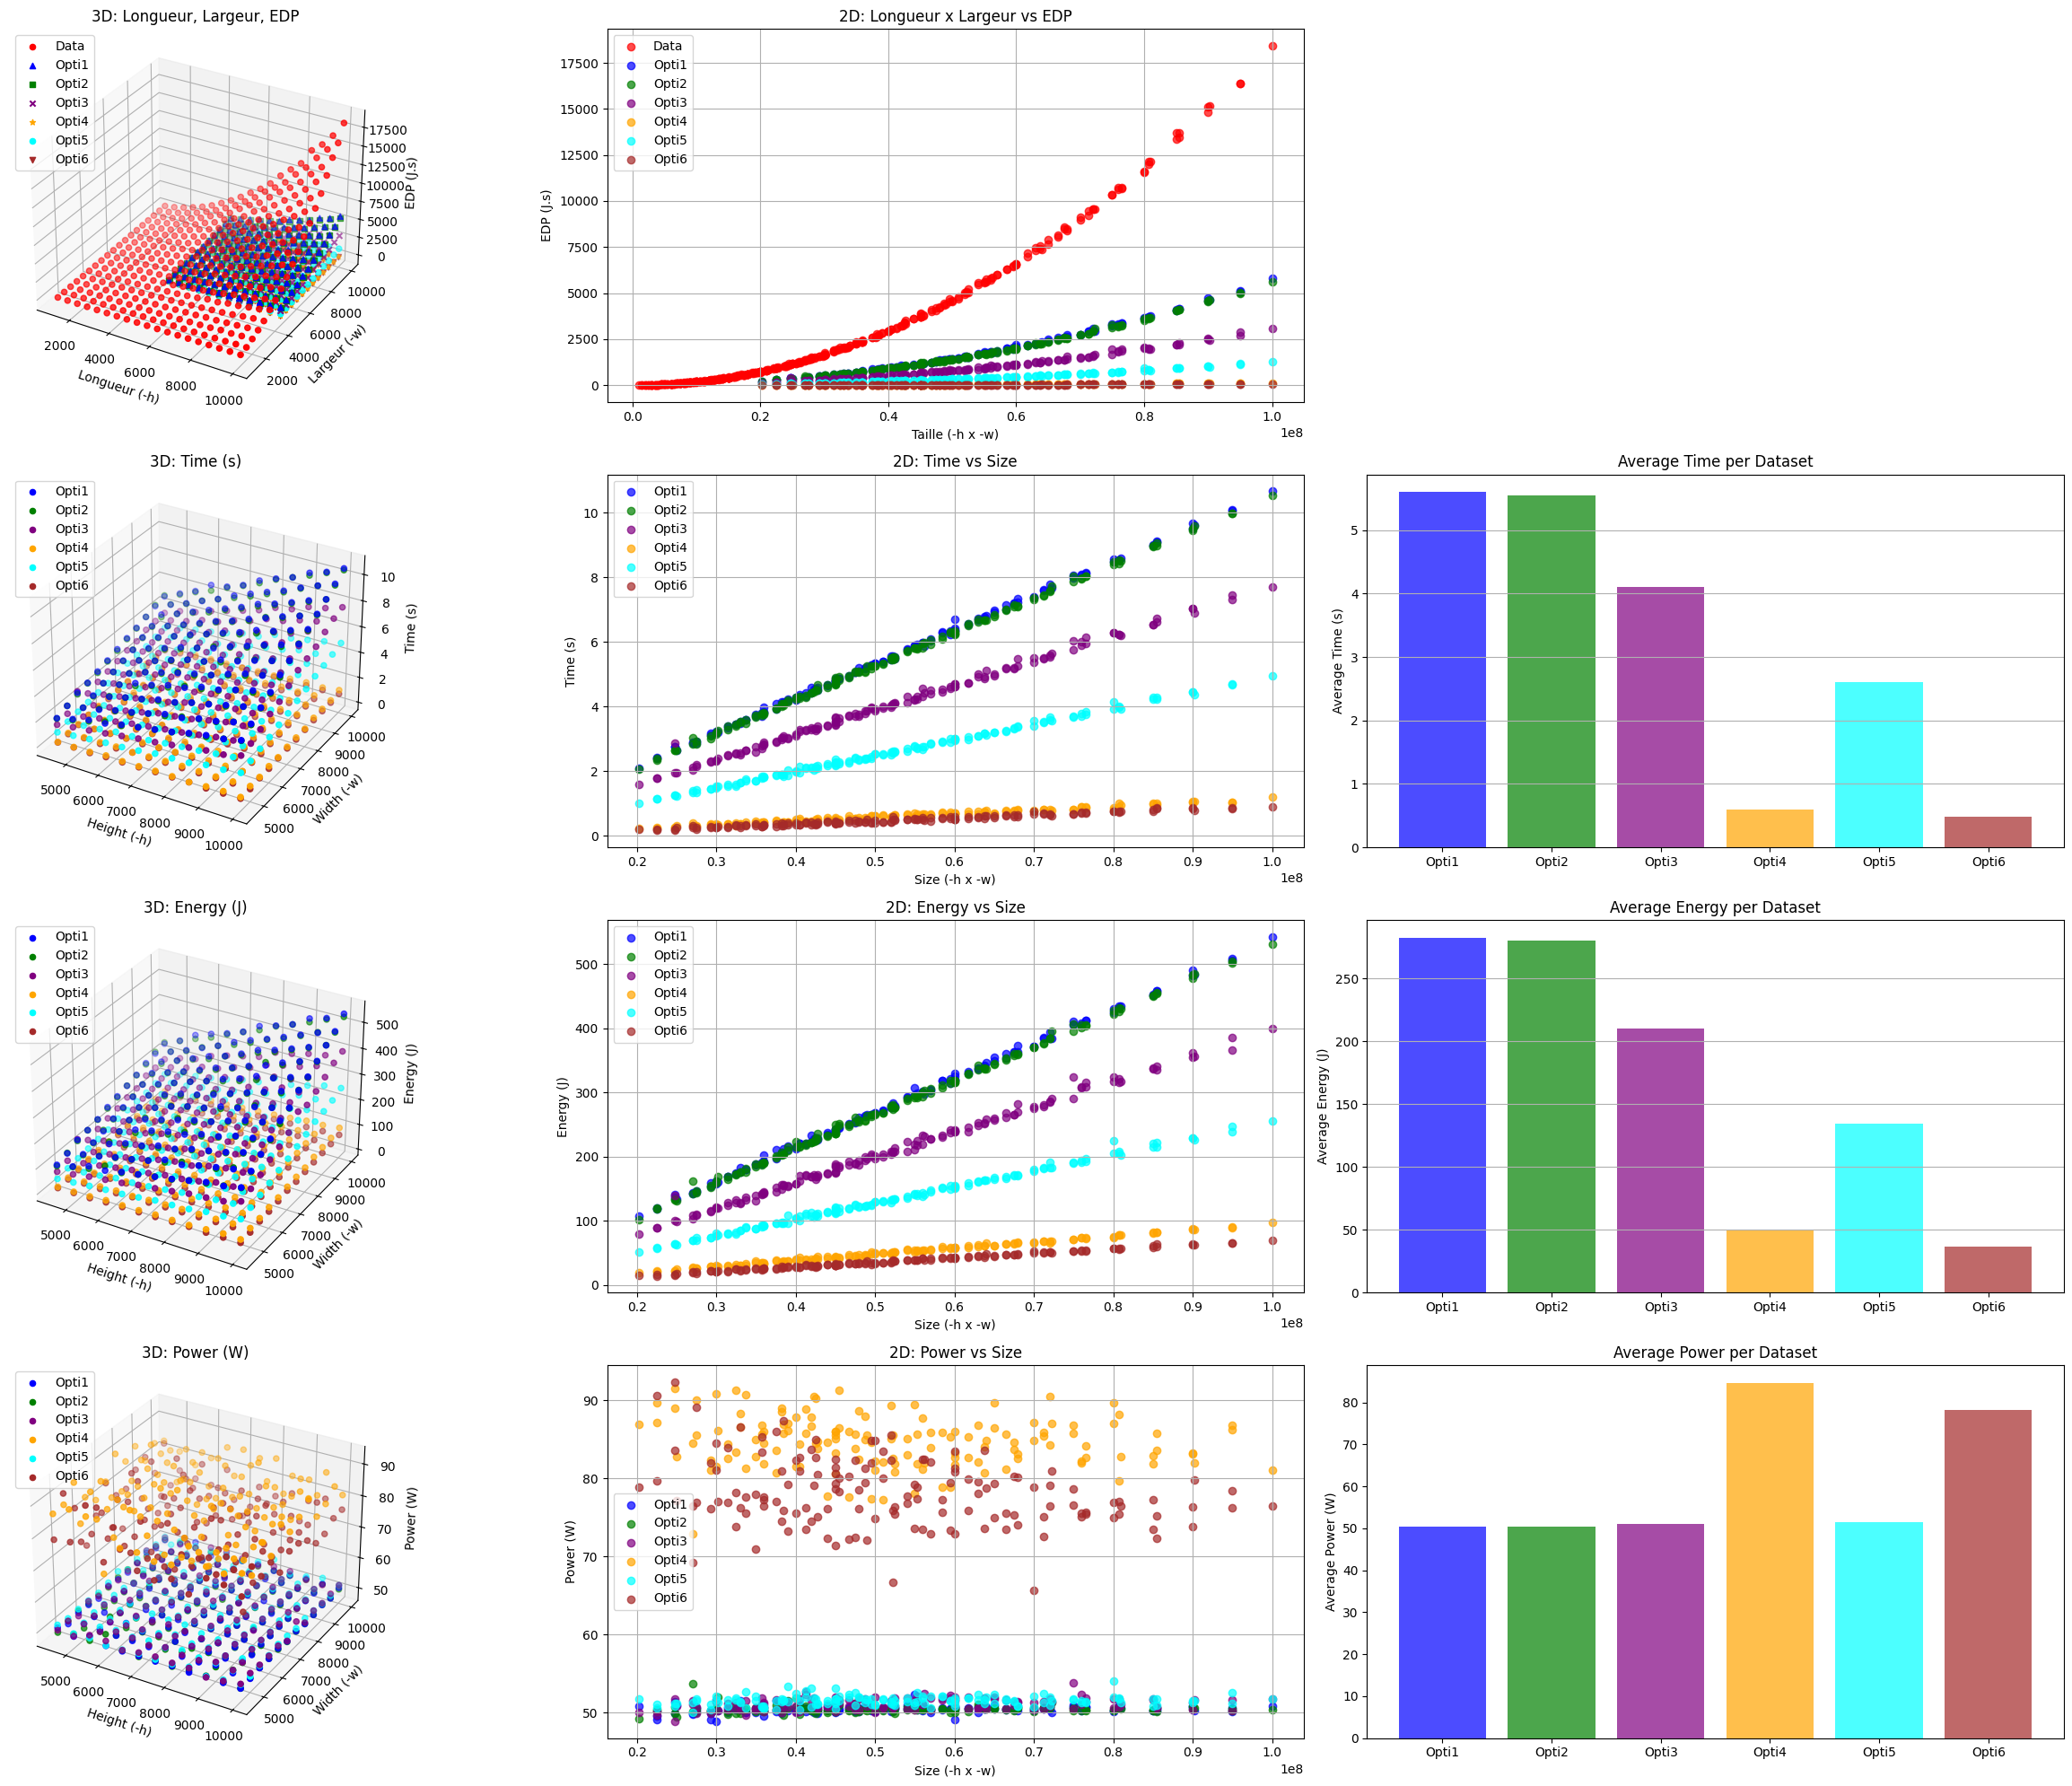

In [158]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(25, 20))
gs = GridSpec(4, 3, figure=fig)

# Premier graphique 3D (Longueur, Largeur, EDP)
ax_3d = fig.add_subplot(gs[0, 0], projection='3d')
ax_3d.scatter(data['-h'], data['-w'], data['EDP'], c='red', label='Data')
ax_3d.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['EDP'], c='blue', marker='^', label='Opti1')
ax_3d.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['EDP'], c='green', marker='s', label='Opti2')
ax_3d.scatter(data_opti3['-h'], data_opti3['-w'], data_opti3['EDP'], c='purple', marker='x', label='Opti3')
ax_3d.scatter(data_opti4['-h'], data_opti4['-w'], data_opti4['EDP'], c='orange', marker='*', label='Opti4')
ax_3d.scatter(data_opti5['-h'], data_opti5['-w'], data_opti5['EDP'], c='cyan', marker='o', label='Opti5')
ax_3d.scatter(data_opti6['-h'], data_opti6['-w'], data_opti6['EDP'], c='brown', marker='v', label='Opti6')
ax_3d.set_title("3D: Longueur, Largeur, EDP")
ax_3d.set_xlabel("Longueur (-h)")
ax_3d.set_ylabel("Largeur (-w)")
ax_3d.set_zlabel("EDP (J.s)")
ax_3d.legend()

# Deuxième graphique 2D (Longueur x Largeur vs EDP)
ax_2d = fig.add_subplot(gs[0, 1])
ax_2d.scatter(data['-h'] * data['-w'], data['EDP'], c='red', label='Data', alpha=0.7)
ax_2d.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['EDP'], c='blue', label='Opti1', alpha=0.7)
ax_2d.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['EDP'], c='green', label='Opti2', alpha=0.7)
ax_2d.scatter(data_opti3['-h'] * data_opti3['-w'], data_opti3['EDP'], c='purple', label='Opti3', alpha=0.7)
ax_2d.scatter(data_opti4['-h'] * data_opti4['-w'], data_opti4['EDP'], c='orange', label='Opti4', alpha=0.7)
ax_2d.scatter(data_opti5['-h'] * data_opti5['-w'], data_opti5['EDP'], c='cyan', label='Opti5', alpha=0.7)
ax_2d.scatter(data_opti6['-h'] * data_opti6['-w'], data_opti6['EDP'], c='brown', label='Opti6', alpha=0.7)
ax_2d.set_title("2D: Longueur x Largeur vs EDP")
ax_2d.set_xlabel("Taille (-h x -w)")
ax_2d.set_ylabel("EDP (J.s)")
ax_2d.legend()
ax_2d.grid(True)

# Troisième graphique 3D (Time)
ax_time_3d = fig.add_subplot(gs[1, 0], projection='3d')
ax_time_3d.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['time'], c='blue', label='Opti1')
ax_time_3d.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['time'], c='green', label='Opti2')
ax_time_3d.scatter(data_opti3['-h'], data_opti3['-w'], data_opti3['time'], c='purple', label='Opti3')
ax_time_3d.scatter(data_opti4['-h'], data_opti4['-w'], data_opti4['time'], c='orange', label='Opti4')
ax_time_3d.scatter(data_opti5['-h'], data_opti5['-w'], data_opti5['time'], c='cyan', label='Opti5')
ax_time_3d.scatter(data_opti6['-h'], data_opti6['-w'], data_opti6['time'], c='brown', label='Opti6')
ax_time_3d.set_title("3D: Time (s)")
ax_time_3d.set_xlabel("Height (-h)")
ax_time_3d.set_ylabel("Width (-w)")
ax_time_3d.set_zlabel("Time (s)")
ax_time_3d.legend()

# Quatrième graphique 2D (Time vs Size)
ax_time_2d = fig.add_subplot(gs[1, 1])
ax_time_2d.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['time'], c='blue', alpha=0.7, label='Opti1')
ax_time_2d.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['time'], c='green', alpha=0.7, label='Opti2')
ax_time_2d.scatter(data_opti3['-h'] * data_opti3['-w'], data_opti3['time'], c='purple', alpha=0.7, label='Opti3')
ax_time_2d.scatter(data_opti4['-h'] * data_opti4['-w'], data_opti4['time'], c='orange', alpha=0.7, label='Opti4')
ax_time_2d.scatter(data_opti5['-h'] * data_opti5['-w'], data_opti5['time'], c='cyan', alpha=0.7, label='Opti5')
ax_time_2d.scatter(data_opti6['-h'] * data_opti6['-w'], data_opti6['time'], c='brown', alpha=0.7, label='Opti6')
ax_time_2d.set_title("2D: Time vs Size")
ax_time_2d.set_xlabel("Size (-h x -w)")
ax_time_2d.set_ylabel("Time (s)")
ax_time_2d.legend()
ax_time_2d.grid(True)

# Cinquième graphique barres (Average Time)
avg_time = [data_opti1['time'].mean(), data_opti2['time'].mean(), data_opti3['time'].mean(),
            data_opti4['time'].mean(), data_opti5['time'].mean(), data_opti6['time'].mean()]
labels = ['Opti1', 'Opti2', 'Opti3', 'Opti4', 'Opti5', 'Opti6']
ax_time_bar = fig.add_subplot(gs[1, 2])
ax_time_bar.bar(labels, avg_time, color=['blue', 'green', 'purple', 'orange', 'cyan', 'brown'], alpha=0.7)
ax_time_bar.set_title("Average Time per Dataset")
ax_time_bar.set_ylabel("Average Time (s)")
ax_time_bar.grid(axis='y')

# Sixième graphique 3D (Energy)
ax_energy_3d = fig.add_subplot(gs[2, 0], projection='3d')
ax_energy_3d.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['energy'], c='blue', label='Opti1')
ax_energy_3d.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['energy'], c='green', label='Opti2')
ax_energy_3d.scatter(data_opti3['-h'], data_opti3['-w'], data_opti3['energy'], c='purple', label='Opti3')
ax_energy_3d.scatter(data_opti4['-h'], data_opti4['-w'], data_opti4['energy'], c='orange', label='Opti4')
ax_energy_3d.scatter(data_opti5['-h'], data_opti5['-w'], data_opti5['energy'], c='cyan', label='Opti5')
ax_energy_3d.scatter(data_opti6['-h'], data_opti6['-w'], data_opti6['energy'], c='brown', label='Opti6')
ax_energy_3d.set_title("3D: Energy (J)")
ax_energy_3d.set_xlabel("Height (-h)")
ax_energy_3d.set_ylabel("Width (-w)")
ax_energy_3d.set_zlabel("Energy (J)")
ax_energy_3d.legend()

# Septième graphique 2D (Energy vs Size)
ax_energy_2d = fig.add_subplot(gs[2, 1])
ax_energy_2d.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['energy'], c='blue', alpha=0.7, label='Opti1')
ax_energy_2d.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['energy'], c='green', alpha=0.7, label='Opti2')
ax_energy_2d.scatter(data_opti3['-h'] * data_opti3['-w'], data_opti3['energy'], c='purple', alpha=0.7, label='Opti3')
ax_energy_2d.scatter(data_opti4['-h'] * data_opti4['-w'], data_opti4['energy'], c='orange', alpha=0.7, label='Opti4')
ax_energy_2d.scatter(data_opti5['-h'] * data_opti5['-w'], data_opti5['energy'], c='cyan', alpha=0.7, label='Opti5')
ax_energy_2d.scatter(data_opti6['-h'] * data_opti6['-w'], data_opti6['energy'], c='brown', alpha=0.7, label='Opti6')
ax_energy_2d.set_title("2D: Energy vs Size")
ax_energy_2d.set_xlabel("Size (-h x -w)")
ax_energy_2d.set_ylabel("Energy (J)")
ax_energy_2d.legend()
ax_energy_2d.grid(True)

# Huitième graphique barres (Average Energy)
avg_energy = [data_opti1['energy'].mean(), data_opti2['energy'].mean(), data_opti3['energy'].mean(),
              data_opti4['energy'].mean(), data_opti5['energy'].mean(), data_opti6['energy'].mean()]
labels = ['Opti1', 'Opti2', 'Opti3', 'Opti4', 'Opti5', 'Opti6']
ax_energy_bar = fig.add_subplot(gs[2, 2])
ax_energy_bar.bar(labels, avg_energy, color=['blue', 'green', 'purple', 'orange', 'cyan', 'brown'], alpha=0.7)
ax_energy_bar.set_title("Average Energy per Dataset")
ax_energy_bar.set_ylabel("Average Energy (J)")
ax_energy_bar.grid(axis='y')

# Neuvième graphique 3D (Power)
ax_power_3d = fig.add_subplot(gs[3, 0], projection='3d')
ax_power_3d.scatter(data_opti1['-h'], data_opti1['-w'], data_opti1['power'], c='blue', label='Opti1')
ax_power_3d.scatter(data_opti2['-h'], data_opti2['-w'], data_opti2['power'], c='green', label='Opti2')
ax_power_3d.scatter(data_opti3['-h'], data_opti3['-w'], data_opti3['power'], c='purple', label='Opti3')
ax_power_3d.scatter(data_opti4['-h'], data_opti4['-w'], data_opti4['power'], c='orange', label='Opti4')
ax_power_3d.scatter(data_opti5['-h'], data_opti5['-w'], data_opti5['power'], c='cyan', label='Opti5')
ax_power_3d.scatter(data_opti6['-h'], data_opti6['-w'], data_opti6['power'], c='brown', label='Opti6')
ax_power_3d.set_title("3D: Power (W)")
ax_power_3d.set_xlabel("Height (-h)")
ax_power_3d.set_ylabel("Width (-w)")
ax_power_3d.set_zlabel("Power (W)")
ax_power_3d.legend()

# Dixième graphique 2D (Power vs Size)
ax_power_2d = fig.add_subplot(gs[3, 1])
ax_power_2d.scatter(data_opti1['-h'] * data_opti1['-w'], data_opti1['power'], c='blue', alpha=0.7, label='Opti1')
ax_power_2d.scatter(data_opti2['-h'] * data_opti2['-w'], data_opti2['power'], c='green', alpha=0.7, label='Opti2')
ax_power_2d.scatter(data_opti3['-h'] * data_opti3['-w'], data_opti3['power'], c='purple', alpha=0.7, label='Opti3')
ax_power_2d.scatter(data_opti4['-h'] * data_opti4['-w'], data_opti4['power'], c='orange', alpha=0.7, label='Opti4')
ax_power_2d.scatter(data_opti5['-h'] * data_opti5['-w'], data_opti5['power'], c='cyan', alpha=0.7, label='Opti5')
ax_power_2d.scatter(data_opti6['-h'] * data_opti6['-w'], data_opti6['power'], c='brown', alpha=0.7, label='Opti6')
ax_power_2d.set_title("2D: Power vs Size")
ax_power_2d.set_xlabel("Size (-h x -w)")
ax_power_2d.set_ylabel("Power (W)")
ax_power_2d.legend()
ax_power_2d.grid(True)

# Onzième graphique barres (Average Power)
avg_power = [data_opti1['power'].mean(), data_opti2['power'].mean(), data_opti3['power'].mean(),
             data_opti4['power'].mean(), data_opti5['power'].mean(), data_opti6['power'].mean()]
labels = ['Opti1', 'Opti2', 'Opti3', 'Opti4', 'Opti5', 'Opti6']
ax_power_bar = fig.add_subplot(gs[3, 2])
ax_power_bar.bar(labels, avg_power, color=['blue', 'green', 'purple', 'orange', 'cyan', 'brown'], alpha=0.7)
ax_power_bar.set_title("Average Power per Dataset")
ax_power_bar.set_ylabel("Average Power (W)")

plt.tight_layout()
plt.show()
